**Training model**

In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time

In [39]:
input_name = 'data_remove_fixed.csv'
df = pd.read_csv(input_name, index_col=0)
df.head()

,Description,Gerne,Label,Description_vector,Length,TFIDF
0,xưa tình xưa tình tác phẩm tinh 2 2016 văn ngu...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,tình xưa tình tác phẩm tinh 2 2016 văn nguyễn ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,xưa tình tác phẩm tinh 2 2016 văn nguyễn nhật ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,tình tác phẩm tinh 2 2016 văn nguyễn nhật ánh ...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",93,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,tác phẩm tinh 2 2016 văn nguyễn nhật ánh 300 t...,Tiểu Thuyết,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [40]:
df.shape

(36556, 6)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.sparse import hstack

# CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['Description'])  # Giữ lại dạng sparse

# TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)  # Giữ lại dạng sparse

# Combine count-based features and TF-IDF features (giữ dạng sparse)
X_combined = hstack([X_count, X_tfidf])



In [42]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse_output=False)

y  = onehot.fit_transform(df[['Gerne']])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape

(29244, 7114)

In [47]:
from keras.layers import Dropout, BatchNormalization, Dense
from keras.models import Sequential

# Khởi tạo mô hình
model = Sequential()

# Lớp BatchNormalization cho đầu vào
model.add(BatchNormalization(input_shape=(7114,)))  # input_dim được thay bằng input_shape

# Lớp Dense 1
model.add(Dense(200, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))

# Lớp Dense 2
model.add(Dense(400, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))

# Lớp Dense 3
model.add(Dense(300, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))

# Lớp Dense 4
model.add(Dense(150, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))

# Lớp đầu ra (phân loại nhị phân)
model.add(Dense(3, activation='sigmoid'))  

# Tổng quan mô hình
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 7114)           │        28,456 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 200)            │     1,423,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,697,759 (6.48 MB)

 Trainable params: 1,683,531 (6.42 MB)

 Non-trainable params: 14,228 (55.58 KB)

In [48]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='min')

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

# Lưu mô hình sau khi huấn luyện hoàn tất
model.save('final_model.keras')

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/100
914/914 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8889 - loss: 0.1572 - val_accuracy: 0.9959 - val_loss: 0.0108 - learning_rate: 0.0010
Epoch 2/100
914/914 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.9960 - loss: 0.0086 - val_accuracy: 0.9969 - val_loss: 0.0093 - learning_rate: 0.0010
Epoch 3/100
914/914 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9948 - loss: 0.0118 - val_accuracy: 0.9981 - val_loss: 0.0129 - learning_rate: 0.0010
Epoch 4/100
914/914 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9977 - loss: 0.0056 - val_accuracy: 0.9974 - val_loss: 0.0087 - learning_rate: 0.0010
Epoch 5/100
914/914 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9970 - loss: 0.0101 - val_accuracy: 0.9960 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 6/100
914/914 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9973 - loss: 0.0072 - val_accuracy: 0.9989 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 7/100
914/914 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9

In [49]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển đổi dạng dự đoán thành nhãn dự đoán
y_pred_classes = (y_pred > 0.5).astype(int)

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [50]:
y_pred_label = onehot.inverse_transform(y_pred)
y_test_label = onehot.inverse_transform(y_test)
y_train_label = onehot.inverse_transform(y_train)

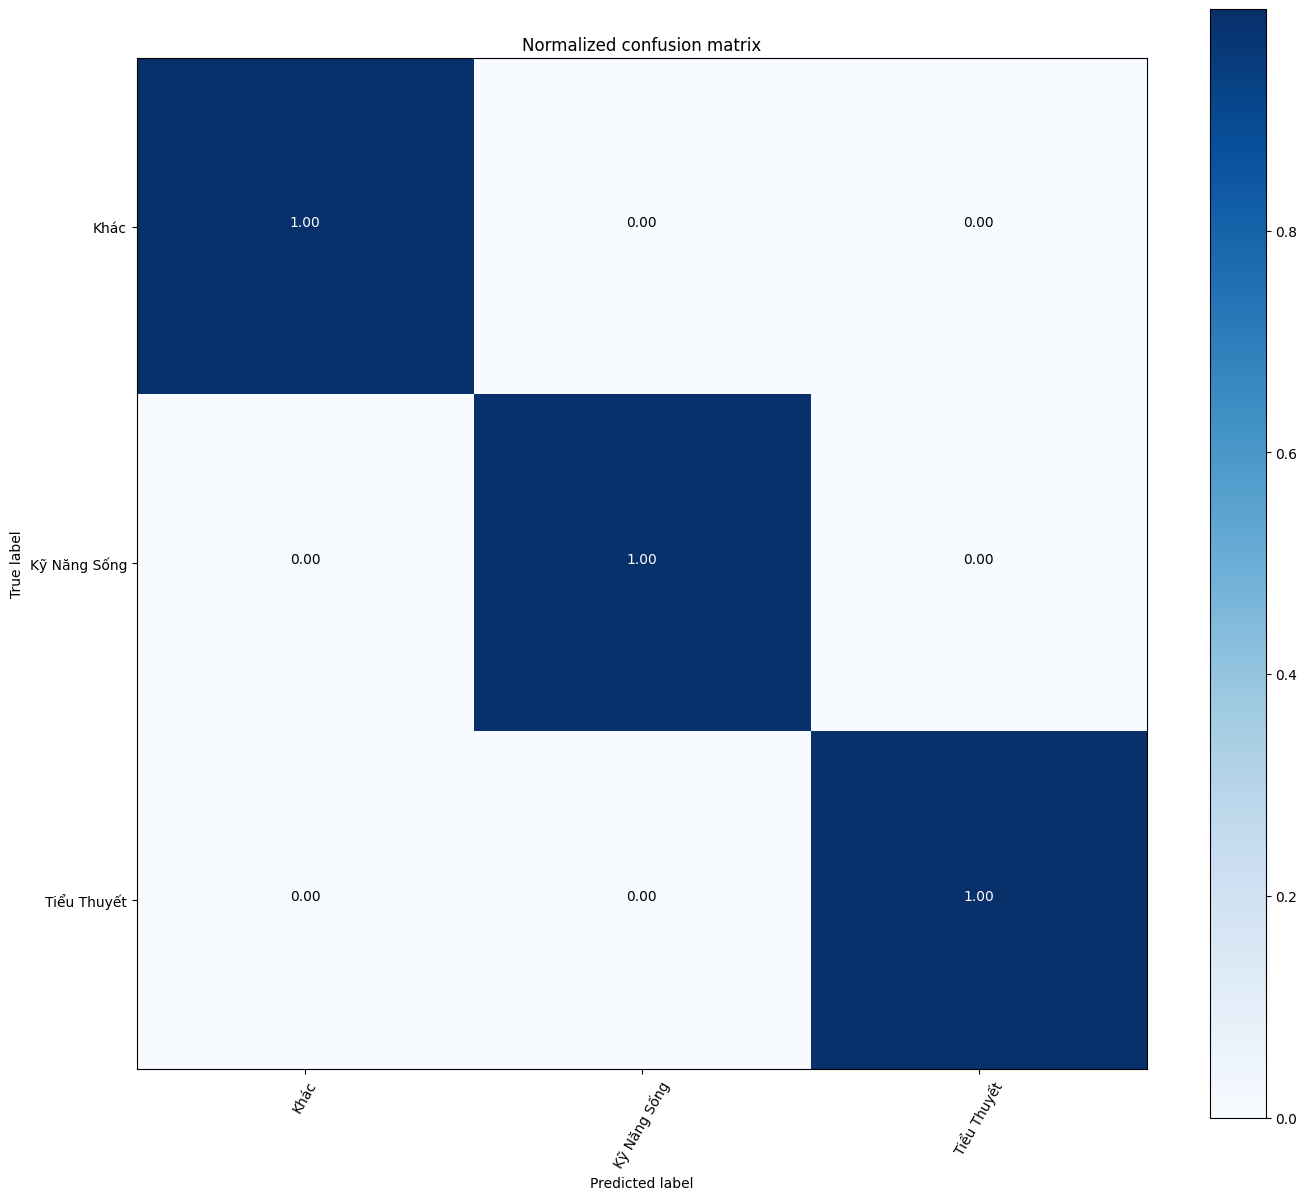

In [51]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_label, y_pred_label)

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = onehot.categories_[0]
# # plt.figure()
# plt.figure(figsize=(14, 12))

# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plt.figure()
plt.figure(figsize=(14, 12))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.xticks(rotation=60)  
plt.savefig('confusion_matrix.png')

plt.show()

In [52]:
#accuracy
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test_label, y_pred_label))

accuracy =  0.99945295404814


In [53]:
from sklearn.metrics import recall_score

# Tính toán recall trên tập huấn luyện
y_train_pred = model.predict(X_train)
y_train_pred_label = onehot.inverse_transform(y_train_pred)

train_recall = recall_score(y_train_label, y_train_pred_label, average='weighted')

# Tính toán recall trên tập kiểm tra
test_recall = recall_score(y_test_label, y_pred_label, average='weighted')

print("Recall trên tập huấn luyện:", train_recall)
print("Recall trên tập kiểm tra:", test_recall)

914/914 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Recall trên tập huấn luyện: 0.9991793188346327
Recall trên tập kiểm tra: 0.99945295404814


In [54]:
from sklearn.metrics import f1_score

# Tính toán F-measure trên tập huấn luyện
train_f1 = f1_score(y_train_label, y_train_pred_label, average='weighted')

# Tính toán F-measure trên tập kiểm tra
test_f1 = f1_score(y_test_label, y_pred_label, average='weighted')

print("F-measure trên tập huấn luyện:", train_f1)
print("F-measure trên tập kiểm tra:", test_f1)

F-measure trên tập huấn luyện: 0.9991793345465415
F-measure trên tập kiểm tra: 0.9994529164893152


Minimum validation loss: 0.0015549814561381936


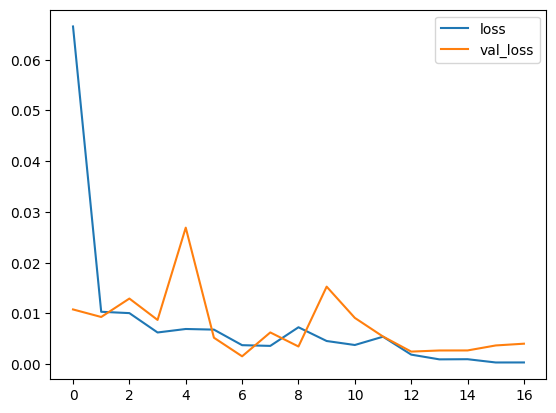

In [55]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
# plt.savefig('loss_plot.png')

In [59]:
import joblib

joblib.dump(count_vectorizer, 'count_vectorizer.joblib')
joblib.dump(onehot, 'one_hot_encoder.joblib')
joblib.dump(tfidf_transformer, 'tfidf.joblib')

['tfidf.joblib']